<a href="https://colab.research.google.com/github/phanindra547/sample/blob/main/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [384]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [385]:
!pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [386]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [387]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [388]:
import snscrape.modules.twitter as sntwitter
import pandas as pd 
hashtag="(@#vocalforlocal) lang:en until:2022-11-28 since:2020-08-09"
data=[]
limit = 1000
for tweet in sntwitter.TwitterSearchScraper(hashtag).get_items():
  if(len(data)==limit):
    break
  else:
    data.append([tweet.content])

In [389]:
import re

In [390]:
from cleantext import clean
for i in range(len(data)):
    data[i]=clean(data[i],no_emoji=True)
    data[i]=re.sub("(#\S+)","",data[i])
    data[i]=re.sub("(@\S+)","",data[i])

In [391]:
 df=pd.DataFrame(data,columns=['Tweet'])
print(df)

                                                 Tweet
0    ['be careful of vocal demands!\n              ...
1    [' yes...n since then i stopped buying from ba...
2    ['thank you for such kind review, . bhai.\nord...
3    ['find harsh ro services @ greater noida west\...
4    ["*nexon* perfect family companion.\nsunshine,...
..                                                 ...
995  ["this diwali, let's bring smiles on their fac...
996  ['advise to buyers!\navoid cash transactions, ...
997  ['  great work  - i would urge more people to ...
998  [" i had gone to them today and bought some am...
999  ['after many many years, decided to do the diw...

[1000 rows x 1 columns]


In [392]:
df['Tweet']=df['Tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','')

<ipython-input-392-fc1563a71860>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet']=df['Tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','')


In [393]:
df['Tweet']=df['Tweet'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,]", '')
df['Tweet']=df['Tweet'].str.replace(r'\n','')

<ipython-input-393-8d2ed10c9453>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet']=df['Tweet'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,]", '')
<ipython-input-393-8d2ed10c9453>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet']=df['Tweet'].str.replace(r'\n','')


In [394]:
df.head()

,Tweet
0,[be careful of vocal demands!
1,[ yesn since then i stopped buying from bata a...
2,[thank you for such kind review bhaiorder our...
3,[find harsh ro services greater noida west
4,[nexon perfect family companionsunshine trees ...


In [395]:
df.drop_duplicates(inplace = True)
df.shape

(922, 1)

In [396]:

df.dropna(inplace = True)
df.head()

,Tweet
0,[be careful of vocal demands!
1,[ yesn since then i stopped buying from bata a...
2,[thank you for such kind review bhaiorder our...
3,[find harsh ro services greater noida west
4,[nexon perfect family companionsunshine trees ...


In [397]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            989, 990, 991, 992, 993, 994, 996, 997, 998, 999],
           dtype='int64', length=922)

In [398]:

display(df.drop_duplicates())
df.shape

,Tweet
0,[be careful of vocal demands!
1,[ yesn since then i stopped buying from bata a...
2,[thank you for such kind review bhaiorder our...
3,[find harsh ro services greater noida west
4,[nexon perfect family companionsunshine trees ...
...,...
994,[this diwali lets bring smiles on their facesl...
996,[advise to buyers!avoid cash transactions scan...
997,[ great work - i would urge more people to g...
998,[ i had gone to them today and bought some ama...


(922, 1)

In [399]:
df.isnull()

,Tweet
0,False
1,False
2,False
3,False
4,False
...,...
994,False
996,False
997,False
998,False


In [400]:
df.isnull().any().any()

False

In [401]:
df.isnull().sum()

Tweet    0
dtype: int64

In [402]:
df.isnull().sum().sum()

0

In [403]:
def getSubjectivity(data):
  return TextBlob(data).sentiment.subjectivity
def getPloarity(data):
  return TextBlob(data).sentiment.polarity
df['subjective']=df['Tweet'].apply(getSubjectivity)
df['Polarity']=df['Tweet'].apply(getPloarity)
df


,Tweet,subjective,Polarity
0,[be careful of vocal demands!,1.000000,-0.125000
1,[ yesn since then i stopped buying from bata a...,0.488333,-0.075000
2,[thank you for such kind review bhaiorder our...,0.350000,0.150000
3,[find harsh ro services greater noida west,0.600000,0.150000
4,[nexon perfect family companionsunshine trees ...,1.000000,1.000000
...,...,...,...
994,[this diwali lets bring smiles on their facesl...,0.233333,0.133333
996,[advise to buyers!avoid cash transactions scan...,0.333333,0.250000
997,[ great work - i would urge more people to g...,0.325000,0.235000
998,[ i had gone to them today and bought some ama...,0.700000,0.325000


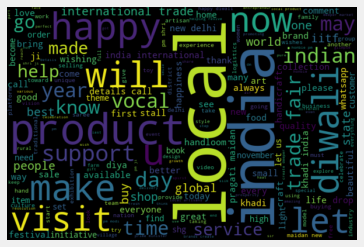

In [404]:
#plot the word cloud
words=' '.join([twt for twt in df['Tweet']])
wordCloud = WordCloud(width=600,height=400,random_state=23,max_font_size=120).generate(words)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [405]:
#create a function to compute the negative ,neutral and positive analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,Tweet,subjective,Polarity,Analysis
0,[be careful of vocal demands!,1.000000,-0.125000,Negative
1,[ yesn since then i stopped buying from bata a...,0.488333,-0.075000,Negative
2,[thank you for such kind review bhaiorder our...,0.350000,0.150000,Positive
3,[find harsh ro services greater noida west,0.600000,0.150000,Positive
4,[nexon perfect family companionsunshine trees ...,1.000000,1.000000,Positive
...,...,...,...,...
994,[this diwali lets bring smiles on their facesl...,0.233333,0.133333,Positive
996,[advise to buyers!avoid cash transactions scan...,0.333333,0.250000,Positive
997,[ great work - i would urge more people to g...,0.325000,0.235000,Positive
998,[ i had gone to them today and bought some ama...,0.700000,0.325000,Positive


In [406]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweet']
round((ptweets.shape[0]/df.shape[0])*100,1)

63.9

In [407]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweet']
round((ntweets.shape[0]/df.shape[0])*100,1)

6.7

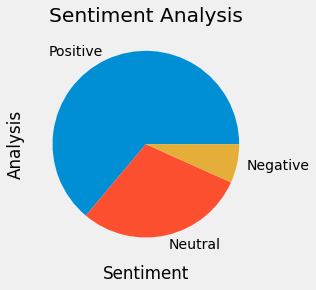

In [410]:
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()